## Support Vector Machine
The basic idea is to <b> maximize margin </b>.
<p>
    Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:
</p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

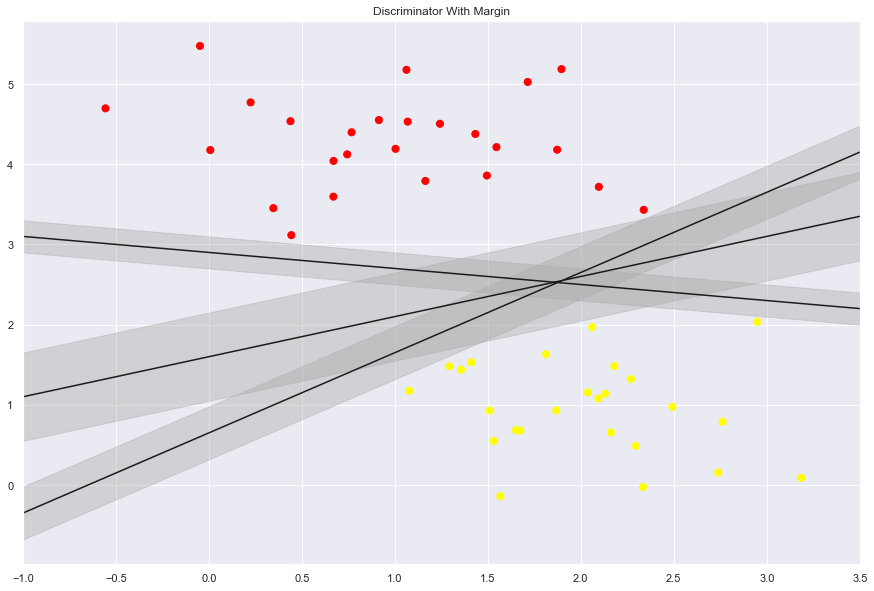

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.title('Discriminator With Margin')
plt.xlim(-1, 3.5);

There are 3 lines with 3 margins. Now the function of SVM is to intutively choose the one that has the maximum margin or separation between the points of either of the class.

### Fitting the SVM Classifier
The goal is to fit the SVM model using the `sklearn.svm.SVC`. The regularization parameter `C` tells how much you want to avoid misclassfication. This is the term that can be considered to work as follows: Larger values of `C`, the model will choose a  smaller margin hyperplane if this hyperplane does a better job of classifying all the training points in the correct class. Conversly, for smaller values of `C` we look for the larger margin hyperplanes even if it misclassifies large number of training points.
<br>
### More on the Regularization Parameter `C` - Ability to generalize
<p>
In SVM, we try to achieve two things:
<br>
- Find the largest minimum margin hyperplane separating the classes.
- Find the line such that it correctly classifies most of the instances.
<br>
The use of the value `C` is the amount of importance you give for achieving the latter. 

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

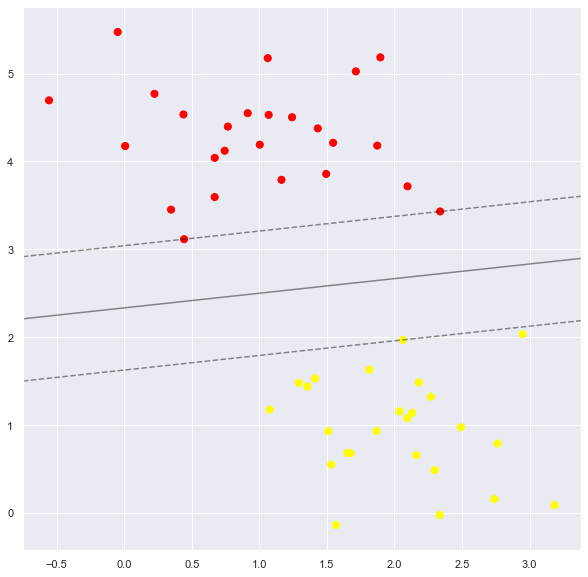

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

The fit of the SVM classifier is determined only by the special support vectors. No other point outside the margin will determine the efficiency of the fit. 
The <b>insensitivity</b> of the SVM model to the distant points is one of the great advantages of the support vectors' contribution to the loss function. Below we use the same SVM model to create a decision boundary to seperate two class of points (60-first scenario, 120-second scenario).

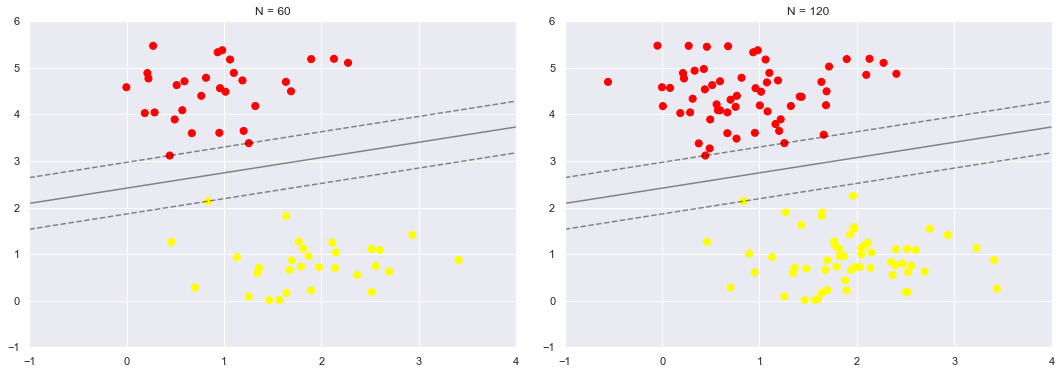

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In both the cases we see that the number of support vectors remain the same and their effect is similar in the choice of the decision boundary.


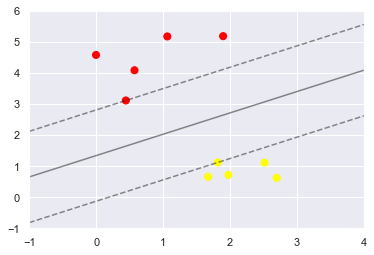

In [8]:
# Interactive plot with ipywidget
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));